# Multi_classification with Neural Networks using Pytorch
//Credit: Chi-Yuan, Lee

//References: https://www.learnpytorch.io/

Welcome to my notebook!! :D

This notebook is to demonstrate how I use pytorch to build up the neural networks to make the multi classification. The purpose of creating this notebook is to record my learning process in the deep learning field. This notebook also give me a small incentive to keep myself in the journey of data science.

## 1. Update the envrionment of colab


This is the really important step since the Colab Environment does 
not always have the package version that we need. Therefore, we need
to update the environment.

In [ ]:
!python --version
!pip install torch -U
!sudo apt-get update -y
!sudo apt-get install python3.9

## 2. Import the packages

In here, we import the essential pages that we need for the further usage.
1. torch for model building.
2. matplotlib for the figure plotting.
3. sklearn for the data simulation and data spliting.
4. requests and pathlib for git repo import.

Finally, we set the var as the our wanted device -> gpu.

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import requests
from pathlib import Path 

gpu = "cuda" if torch.cuda.is_available() else "cpu"
gpu

'cuda'

## 3. Create the dataset for training
To build the first neural networks model, we use sklearn to make some simulations to create the dataset. Using "blobs" can create the beautiful data clusters in the designated area.

Besides, we use the git repo to plot the model decision boundary to visualize the learning results.

To do so, we design the function to create the blobs. For the furter convinence, I return the NUM_FEATURES and NUM_CLASSES as well so I don't have to search the NUM_FEATURES and NUM_CLASSES.

References: https://www.learnpytorch.io/02_pytorch_classification/ 

torch.Size([1000, 2])
torch.Size([1000])


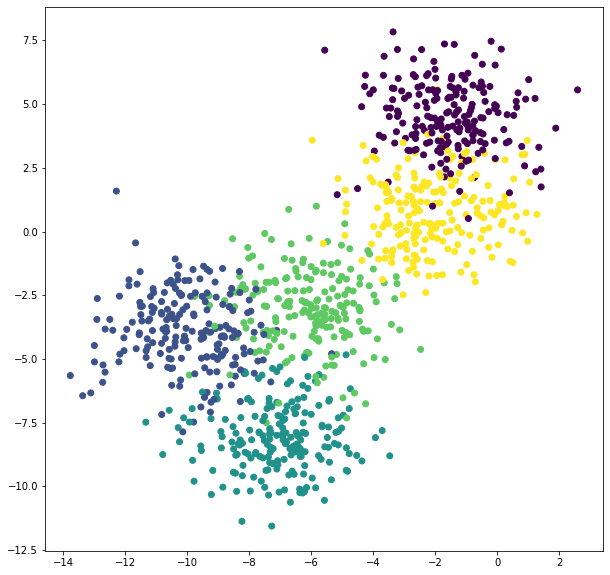

In [ ]:
# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary
def create_blobls_dataset(SAMPLE_SIZE, NUM_FEATURES, NUM_CLASSES, RANDOM_SEED, CLUSTER):
  
  X_blob, y_blob = make_blobs(n_samples=SAMPLE_SIZE, n_features=NUM_FEATURES, centers=NUM_CLASSES, cluster_std=CLUSTER, random_state=RANDOM_SEED)

  X_blob = torch.from_numpy(X_blob).type(torch.float)
  y_blob = torch.from_numpy(y_blob).type(torch.LongTensor) #since the number of cluster should be an integer. Becasue in the accuracy calculation, we need integer.
  print(X_blob.shape)
  print(y_blob.shape)

  plt.figure(figsize=(10,10))
  plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob)
  return X_blob, y_blob, NUM_FEATURES, NUM_CLASSES

X_blob, y_blob, NUM_FEATURES, NUM_CLASSES = create_blobls_dataset(SAMPLE_SIZE=1000, NUM_FEATURES=2, NUM_CLASSES=5, RANDOM_SEED=1, CLUSTER=1.4)

Let's check the first five dot from the label, so called y_blob.

Where the data, so called X_blob, should be the dot's location.

In [ ]:
y_blob[:5], X_blob[:5]

(tensor([2, 1, 3, 3, 4]), tensor([[ -7.3049,  -7.8915],
         [-13.1157,  -6.3324],
         [ -5.8914,  -3.3269],
         [ -5.0481,  -2.9162],
         [ -1.8047,   1.6682]]))

And now, we split the dataset into train and test.

In [ ]:
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(
      X_blob, y_blob, test_size=0.2, random_state=1)
print(X_blob_train.shape)
print(X_blob_test.shape)

torch.Size([800, 2])
torch.Size([200, 2])


## 4. Build my first NN model using pytorch :)
After data preparation (of course, we do not have data preprocessing, it is just the example.), we need to build the NN model to predict the data.

I choose the most initial way (class, and for-loop) to build and train the model. There are a easier way to build and train using model.Sequential() in Keras, but that will be another topic since the structure is different from pytorch.

So, first we create the class, and import the package called "nn".

Then, I use nn.Sequential() to include all the layers in the model.

Note that I use ReLU as the activation function in this case which is one of the most common activation function currently.

Finally, we use the forward function to designate the return value and layers.

In [ ]:
from torch import nn

class NumConfigModel(nn.Module):
  def __init__(self, input_features, hidden_units, output_features):
    super().__init__()
    
    self.stack_layers = nn.Sequential(
    
    nn.Linear(in_features=input_features, out_features=hidden_units),
    nn.ReLU(),
    nn.Linear(in_features=hidden_units, out_features=hidden_units),
    nn.ReLU(),
    nn.Linear(in_features=hidden_units, out_features=hidden_units),
    nn.ReLU(),
    nn.Linear(in_features=hidden_units, out_features=output_features)
    
    )

  def forward(self, x):
    return self.stack_layers(x)
model_0 = NumConfigModel(input_features=NUM_FEATURES, hidden_units=128, output_features=NUM_CLASSES).to(gpu)
model_0

NumConfigModel(
  (stack_layers): Sequential(
    (0): Linear(in_features=2, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=5, bias=True)
  )
)

Now, I deisgn the loss function and optimizer.

For the loss function, because the outcome will be multiple results, therefore, I choose cross entropy loss as the function in the model. Next, for the optimizer, since the dataset we choose is simple, I choose SGD as the optimizer and set the learning rate as 0.1.

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.01)

Next, we create the accuracy function to show the result in every epoch. The accuracy function is to compare the difference between the true value and the prediction. Torch.eq() can judge whether the y_true is equal to y_pred, so if the y_true is 3 but the y_pred is 1, then the value of torch.qu() will be False (which is 0), then we sum all the value together to see how many True (which is 1), finally, we return the value as the number (so we use item()).




In [ ]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

## 5. Train the model
After setup the accuracy function, loss function, and optimizer, now I would like to build the for-loop to train the model.



In [ ]:
torch.manual_seed(1)
epochs = 1000
X_train = X_blob_train.to(gpu)
y_train = y_blob_train.to(gpu)
X_test = X_blob_test.to(gpu)
y_test = y_blob_test.to(gpu)


for epoch in range(epochs):
  # put the model into the train mode
  model_0.train()
  # give the first logits output
  y_logits = model_0(X_train).to(gpu)
  # go through the softmax layer
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
  
  # calculate the loss and accuracy
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred,)
  
  optimizer.zero_grad()

  loss.backward()

  optimizer.step()
  
  model_0.eval()

  with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_0(X_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred,)
    # Print out what's happening
  if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f} | Accuracy: {acc:.5f} | Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.5f}")



Epoch: 0 | Loss: 1.66935 | Accuracy: 21.00000 | Test Loss: 1.64724 | Test Accuracy: 16.50000
Epoch: 100 | Loss: 0.81569 | Accuracy: 59.75000 | Test Loss: 0.83156 | Test Accuracy: 60.00000
Epoch: 200 | Loss: 0.65510 | Accuracy: 69.37500 | Test Loss: 0.67793 | Test Accuracy: 67.50000
Epoch: 300 | Loss: 0.59010 | Accuracy: 72.75000 | Test Loss: 0.61562 | Test Accuracy: 71.50000
Epoch: 400 | Loss: 0.54771 | Accuracy: 75.12500 | Test Loss: 0.57505 | Test Accuracy: 74.50000
Epoch: 500 | Loss: 0.51041 | Accuracy: 78.75000 | Test Loss: 0.53909 | Test Accuracy: 77.50000
Epoch: 600 | Loss: 0.47209 | Accuracy: 82.12500 | Test Loss: 0.50029 | Test Accuracy: 80.00000
Epoch: 700 | Loss: 0.43190 | Accuracy: 85.00000 | Test Loss: 0.45862 | Test Accuracy: 83.00000
Epoch: 800 | Loss: 0.39339 | Accuracy: 87.00000 | Test Loss: 0.41746 | Test Accuracy: 86.00000
Epoch: 900 | Loss: 0.36437 | Accuracy: 88.50000 | Test Loss: 0.38744 | Test Accuracy: 84.50000


## 6. Visualize the result and the decision boundary
As we can see the accuracy is really good, then I would like to plot the decision boundary to visualize the results. Note that because this is 2 variables dataset which is easy to visualize in the 2D diagram. If the dataset is multi-dimensions, we can use T-SNE to visualize as well.

To visualize the decision boundary, there is a git repo that can easily access this function. Therefore, I import the function before. Now I just need to use it.

Reference: https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py

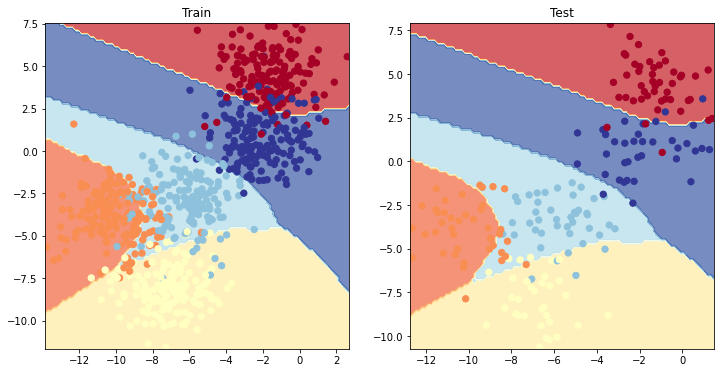

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_blob_test, y_blob_test)

## 7. Other experiments
Looks really good!! 

In here, I want to do a small experiment, I want to use differen activation function to see the learning result under the same condition. 

Therefore, I create the second model. But this time, I would replace ReLU() to ELU(), the other parameters remain the same. I want to test how the activate function will affect the result.

In [ ]:
class NumConfigModel_ELU(nn.Module):
  def __init__(self, input_features, hidden_units, output_features):
    super().__init__()
    
    self.stack_layers = nn.Sequential(
    
    nn.Linear(in_features=input_features, out_features=hidden_units),
    nn.ELU(),
    nn.Linear(in_features=hidden_units, out_features=hidden_units),
    nn.ELU(),
    nn.Linear(in_features=hidden_units, out_features=hidden_units),
    nn.ELU(),
    nn.Linear(in_features=hidden_units, out_features=output_features)
    
    )

  def forward(self, x):
    return self.stack_layers(x)
model_1 = NumConfigModel_ELU(input_features=NUM_FEATURES, hidden_units=128, output_features=NUM_CLASSES).to(gpu)
model_1

NumConfigModel_ELU(
  (stack_layers): Sequential(
    (0): Linear(in_features=2, out_features=128, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ELU(alpha=1.0)
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ELU(alpha=1.0)
    (6): Linear(in_features=128, out_features=5, bias=True)
  )
)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.01)

In [ ]:
torch.manual_seed(1)
epochs = 1000
X_train = X_blob_train.to(gpu)
y_train = y_blob_train.to(gpu)
X_test = X_blob_test.to(gpu)
y_test = y_blob_test.to(gpu)


for epoch in range(epochs):
  
  model_1.train()
  
  y_logits = model_1(X_train).to(gpu)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred,)
  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_1.eval()

  with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_1(X_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred,)
    # Print out what's happening
  if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f} | Accuracy: {acc:.5f} | Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.5f}")

Epoch: 0 | Loss: 1.59120 | Accuracy: 41.87500 | Test Loss: 1.50525 | Test Accuracy: 34.00000
Epoch: 100 | Loss: 0.64897 | Accuracy: 79.12500 | Test Loss: 0.66076 | Test Accuracy: 76.00000
Epoch: 200 | Loss: 0.48256 | Accuracy: 85.12500 | Test Loss: 0.49710 | Test Accuracy: 82.50000
Epoch: 300 | Loss: 0.39545 | Accuracy: 86.62500 | Test Loss: 0.40939 | Test Accuracy: 87.50000
Epoch: 400 | Loss: 0.34210 | Accuracy: 88.00000 | Test Loss: 0.35406 | Test Accuracy: 89.50000
Epoch: 500 | Loss: 0.30938 | Accuracy: 89.00000 | Test Loss: 0.31877 | Test Accuracy: 90.00000
Epoch: 600 | Loss: 0.28953 | Accuracy: 89.62500 | Test Loss: 0.29636 | Test Accuracy: 91.00000
Epoch: 700 | Loss: 0.27708 | Accuracy: 89.50000 | Test Loss: 0.28186 | Test Accuracy: 91.00000
Epoch: 800 | Loss: 0.26887 | Accuracy: 89.75000 | Test Loss: 0.27211 | Test Accuracy: 90.50000
Epoch: 900 | Loss: 0.26313 | Accuracy: 89.50000 | Test Loss: 0.26529 | Test Accuracy: 91.00000


Looks really impressive, just simply change the activation function, the accuracy can increase from 87% to 91%. Let's visualize the result.

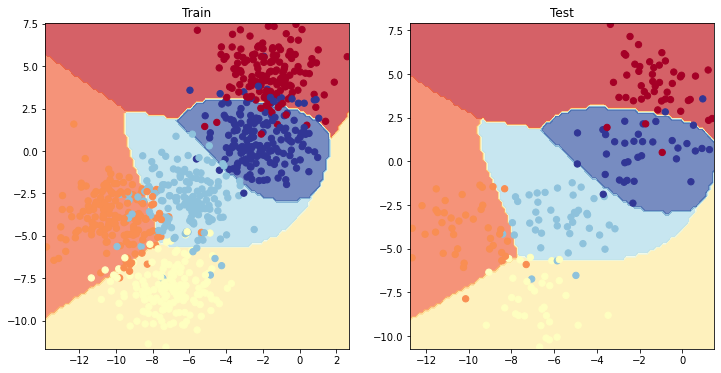

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_blob_test, y_blob_test)

The diagram is more vivid that the model will start to bend the decision boundary more often compared to model with purely ReLU(). 

--END--
